In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import sympy as sp
import numpy as np
import math

### Exact solution using Sympy

In [2]:
x = sp.Function("x")
K = sp.Function("K")
t = sp.symbols("t")
m = sp.symbols("m")
r = sp.symbols("r")
k = sp.symbols("k")

dgl = sp.Eq(m*x(t).diff(t).diff(t) + r*x(t).diff(t) + k*x(t), K(t))
dgl

Eq(k*x(t) + m*Derivative(x(t), (t, 2)) + r*Derivative(x(t), t), K(t))

In [3]:
sp.dsolve(dgl, x(t))

Eq(x(t), C1*exp(t*(-r - sqrt(-4*k*m + r**2))/(2*m)) + C2*exp(t*(-r + sqrt(-4*k*m + r**2))/(2*m)) - exp(t*(-r - sqrt(-4*k*m + r**2))/(2*m))*Integral(K(t)*exp(r*t/(2*m))*exp(t*sqrt(-4*k*m + r**2)/(2*m)), t)/sqrt(-4*k*m + r**2) + exp(t*(-r + sqrt(-4*k*m + r**2))/(2*m))*Integral(K(t)*exp(r*t/(2*m))*exp(-t*sqrt(-4*k*m + r**2)/(2*m)), t)/sqrt(-4*k*m + r**2))

### Runge-Kutta solution using Scipy

In [21]:
def oscillator(t, x, K_0, omega, m, r, k):

    x_1, x_2 = x # x: vector of x_1 and x_2
    
    dxdt = [x_2, 1/m*(K_0*math.sin(omega*t) - r*x_2 - k*x_1)]
    return dxdt

In [22]:
from scipy.integrate import solve_ivp
init = [0, 0]
time = np.arange(0, 3, 0.1)
time_span = [0, 3]

K_0 = 1
omega = 0.2
m = 0.5
r = 0.1
k = 0.2

dgl_RK45 = solve_ivp(oscillator, time_span, init, method="RK45", t_eval=time, args = (K_0, omega, m, r, k))

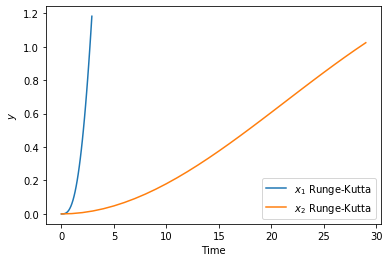

In [27]:
plt.figure()
plt.plot(time, dgl_RK45.y[0, :], dgl_RK45.y[1, :])
plt.legend(["$x_1$ Runge-Kutta", "$x_2$ Runge-Kutta"])
plt.xlabel("Time")
plt.ylabel("$y$")
plt.show()

In [29]:
dgl_RK45

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])
 t_events: None
        y: array([[0.00000000e+00, 6.63200869e-05, 5.27309831e-04, 1.76946532e-03,
        4.16797423e-03, 8.08480963e-03, 1.38672118e-02, 2.18506552e-02,
        3.23538823e-02, 4.56764372e-02, 6.20986655e-02, 8.18806121e-02,
        1.05259336e-01, 1.32462317e-01, 1.63694785e-01, 1.99137417e-01,
        2.38946337e-01, 2.83253116e-01, 3.32164771e-01, 3.85763766e-01,
        4.44108756e-01, 5.07242177e-01, 5.75185763e-01, 6.47938342e-01,
        7.25476244e-01, 8.07753300e-01, 8.94700842e-01, 9.86227707e-01,
        1.08222023e+00, 1.18254226e+00],
       [0.00000000e+00, 1.98600542e-03, 7.88292551e-03, 1.75874367e-02,
      